# **Système de Recherche d’Images par le Contenu avec YOLOv8 et Descripteurs Visuels**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
print(ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.235


In [ ]:
import os
from ultralytics.utils.downloads import safe_download

url = "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt"

model_path = safe_download(url=url, file="yolov8n.pt")
print("Modèle téléchargé dans :", model_path)


Modèle téléchargé dans : yolov8n.pt


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")


# **Tester le modele**


image 1/1 /content/test.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 222.1ms
Speed: 7.4ms preprocess, 222.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)


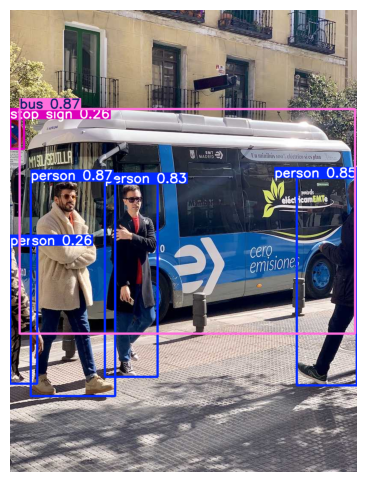

Classe: bus, Confiance: 0.87, Boîte: [22.87126922607422, 231.27731323242188, 805.002685546875, 756.84033203125]
Classe: person, Confiance: 0.87, Boîte: [48.55046844482422, 398.5522155761719, 245.34556579589844, 902.7026977539062]
Classe: person, Confiance: 0.85, Boîte: [669.472900390625, 392.1861267089844, 809.7201538085938, 877.0354614257812]
Classe: person, Confiance: 0.83, Boîte: [221.5172882080078, 405.79864501953125, 344.9706115722656, 857.53662109375]
Classe: person, Confiance: 0.26, Boîte: [0.0, 550.5250244140625, 63.00695037841797, 873.4429321289062]
Classe: stop sign, Confiance: 0.26, Boîte: [0.05817067623138428, 254.4593963623047, 32.55740737915039, 324.8741455078125]


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import urllib.request

# Télécharger l'image
url = "https://ultralytics.com/images/bus.jpg"
urllib.request.urlretrieve(url, "test.jpg")

# Charger le modèle
model = YOLO("yolov8n.pt")

# Lancer l'inférence
img = "test.jpg"
results = model(img)

# ----- AFFICHER L’IMAGE AVEC LES DÉTECTIONS -----
# results[0].plot() renvoie une image annotée (BGR)
annotated = results[0].plot()

# Convertir en RGB pour matplotlib
annotated = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(annotated)
plt.axis("off")
plt.show()

# ----- AFFICHER LES BOÎTES, CLASSES, SCORES -----
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    xyxy = box.xyxy[0].tolist()

    print(f"Classe: {model.names[cls]}, Confiance: {conf:.2f}, Boîte: {xyxy}")
